<a href="https://colab.research.google.com/github/whiteshadow008/Dhanush/blob/main/spamdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

# Display the first few rows
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [8]:
data.isna().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [9]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# Rename columns for easier access
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Check for missing values
print(data.isnull().sum())

# Convert labels to binary (spam=1, ham=0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})


label      0
message    0
dtype: int64


<ipython-input-11-4421d8bcab6c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'spam': 1, 'ham': 0})


In [12]:
def extract_features(row):
    text = row['message']
    length = len(text)
    has_free = int('free' in text.lower())
    has_offer = int('offer' in text.lower())
    has_exclamation = text.count('!')
    has_cash=int('cash' in text.lower())
    has_win=int('win' in text.lower())
    has_discount=int('discount' in text.lower())

    return pd.Series([length, has_free, has_offer, has_exclamation,has_cash,has_win,has_discount])

# Create feature DataFrame
features = data.apply(extract_features, axis=1)
features.columns = ['length', 'has_free', 'has_offer', 'has_exclamation','has_cash','has_win','has_discount']

# Combine features with target labels
X = features
y = data['label']


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
X_train

,length,has_free,has_offer,has_exclamation,has_cash,has_win,has_discount
708,155,0,0,0,0,0,0
4338,34,0,0,0,0,0,0
5029,84,0,0,0,0,0,0
4921,156,0,0,0,0,0,0
2592,117,0,0,0,0,0,0
...,...,...,...,...,...,...,...
3772,71,0,0,0,0,0,0
5191,22,0,0,0,0,0,0
5226,45,0,0,0,0,0,0
5390,26,0,0,0,0,0,0


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
naive_bayes=accuracy_score(y_test, y_pred)
# Evaluate the model
print("Accuracy:",naive_bayes*100,"%")
print(classification_report(y_test, y_pred))


Accuracy: 89.05502392344498 %
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1453
           1       0.62      0.43      0.51       219

    accuracy                           0.89      1672
   macro avg       0.77      0.69      0.72      1672
weighted avg       0.88      0.89      0.88      1672



In [16]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
logestic_regression=accuracy_score(y_test, y_pred)
print("Accuracy:",logestic_regression *100,"%")

Accuracy: 90.13157894736842 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#xgboost
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
xgboost=accuracy_score(y_test, y_pred)
print("Accuracy:",xgboost*100,"%")

Accuracy: 92.10526315789474 %


In [18]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
Decision_Tree=accuracy_score(y_test, y_pred)
print("Accuracy:", Decision_Tree*100,"%")

Accuracy: 91.26794258373205 %


In [19]:
#kmeans
from sklearn.cluster import KMeans
km=KMeans(n_clusters=6)
km.fit(X_train,y_train)
y_pred=km.predict(X_test)
k_means=accuracy_score(y_test, y_pred)
print("Accuracy:", k_means*100,"%")

Accuracy: 40.66985645933015 %


In [20]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
random_forest=accuracy_score(y_test, y_pred)
print("Accuracy:",random_forest*100,"%")

Accuracy: 91.20813397129187 %


In [21]:
Accuracies=[naive_bayes*100,logestic_regression*100,xgboost*100,Decision_Tree*100,k_means*100,random_forest*100]
Models=["Naive Bayes","Logistic Regression","XGBoost","Decision Tree","K-Means","Random Forest"]
df=pd.DataFrame({"Models":Models,"Accuracies":Accuracies})
df


,Models,Accuracies
0,Naive Bayes,89.055024
1,Logistic Regression,90.131579
2,XGBoost,92.105263
3,Decision Tree,91.267943
4,K-Means,40.669856
5,Random Forest,91.208134


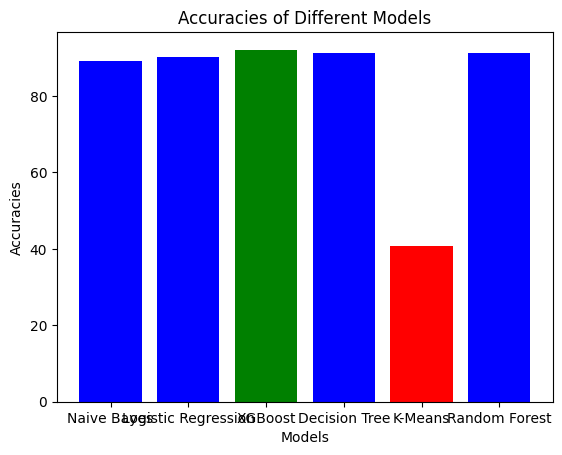

In [22]:
colors=["green" if x > 92 else "blue" if  x >80  else "red" for x in Accuracies]
import matplotlib.pyplot as plt
plt.bar(Models,Accuracies,color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Accuracies of Different Models")
plt.show()

In [26]:
def extract_features_from_input(email_text):
    length = len(email_text)
    has_free = int('free' in email_text.lower())
    has_offer = int('offer' in email_text.lower())
    has_exclamation = email_text.count('!')
    has_cash = int('cash' in email_text.lower())
    has_win = int('win' in email_text.lower())
    has_discount=int('discount' in email_text.lower())


    return [length, has_free, has_offer, has_exclamation, has_cash, has_win,has_discount] # Return all 6 features

def predict_spam(email_text):
    features = extract_features_from_input(email_text)
    prediction = model.predict([features])[0]
    return "Spam" if prediction == 1 else "Not Spam"

# Example of taking user input
email_input = input("Please enter the email text: ")
result = predict_spam(email_input)
print("The email is classified as:", result)

Please enter the email text: Subject: 💸 You’ve Won $1,000,000! Claim Now! 💸  Dear Winner,  Congratulations! Your email has been randomly selected as the lucky winner of our $1,000,000 Grand Prize Giveaway!  To claim your reward, all you need to do is confirm your details by clicking the link below and completing a short form: Claim Your Prize Here  Hurry! This offer is only valid for the next 24 hours.  Please note: Failure to claim your prize within the specified time will result in forfeiture.  To ensure smooth processing, reply with the following details:  Full Name Address Phone Number Bank Details Thank you for participating, and we look forward to sending you your prize!  Warm regards, John Doe Prize Distribution Team Global Sweepstakes Inc.
The email is classified as: Spam


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy for Naive Bayes: 89.06%
Accuracy for Logistic Regression: 90.13%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for XGBoost: 92.11%
Accuracy for Decision Tree: 91.09%
Accuracy for K-Means: 46.17%
Accuracy for Random Forest: 91.27%
                Models  Accuracies
0          Naive Bayes   89.055024
1  Logistic Regression   90.131579
2              XGBoost   92.105263
3        Decision Tree   91.088517
4              K-Means   46.172249
5        Random Forest   91.267943


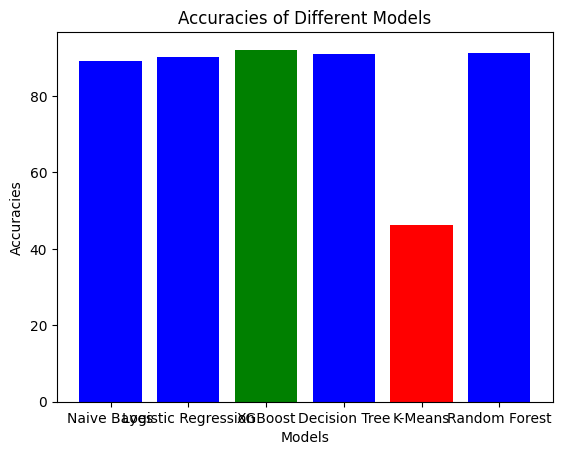

In [27]:

from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# ... (Rest of your code, including loading data, feature extraction, etc.)

models = [
    GaussianNB(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KMeans(n_clusters=6),
    RandomForestClassifier()
]
model_names = [
    "Naive Bayes",
    "Logistic Regression",
    "XGBoost",
    "Decision Tree",
    "K-Means",
    "Random Forest"
]
accuracies = []

for model, model_name in zip(models, model_names):
  if model_name == "K-Means":
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
  else:
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy * 100)
  print(f"Accuracy for {model_name}: {accuracy * 100:.2f}%")

df = pd.DataFrame({"Models": model_names, "Accuracies": accuracies})
print(df)

colors = ["green" if x > 92 else "blue" if x > 80 else "red" for x in accuracies]
plt.bar(model_names, accuracies, color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Accuracies of Different Models")
plt.show()

# ... (Rest of your code, including the prediction function)

In [28]:
!pip install streamlit
!pip install pyngrok


In [29]:
%%writefile app.py
# Your Streamlit app code here
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# Define models, load data, and run training as in previous example
# (Replace placeholders with actual data loading code)

st.title("Model Accuracy Comparison")
# ... rest of your Streamlit code ...


# Load the dataset (replace with your actual dataset path)
data = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

# Rename columns for easier access
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Convert labels to binary (spam=1, ham=0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})


def extract_features(row):
    text = row['message']
    length = len(text)
    has_free = int('free' in text.lower())
    has_offer = int('offer' in text.lower())
    has_exclamation = text.count('!')
    has_cash = int('cash' in text.lower())
    has_win = int('win' in text.lower())
    has_discount = int('discount' in text.lower())

    return pd.Series([length, has_free, has_offer, has_exclamation, has_cash, has_win, has_discount])


# Create feature DataFrame
features = data.apply(extract_features, axis=1)
features.columns = ['length', 'has_free', 'has_offer', 'has_exclamation', 'has_cash', 'has_win', 'has_discount']

# Combine features with target labels
X = features
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier (you can change this to your preferred model)
model = GaussianNB()
model.fit(X_train, y_train)


def extract_features_from_input(email_text):
    length = len(email_text)
    has_free = int('free' in email_text.lower())
    has_offer = int('offer' in email_text.lower())
    has_exclamation = email_text.count('!')
    has_cash = int('cash' in email_text.lower())
    has_win = int('win' in email_text.lower())
    has_discount = int('discount' in email_text.lower())
    return [length, has_free, has_offer, has_exclamation, has_cash, has_win, has_discount]


def predict_spam(email_text):
    features = extract_features_from_input(email_text)
    prediction = model.predict([features])[0]
    return "Spam" if prediction == 1 else "Not Spam"


# Streamlit UI
st.title("Spam Email Classifier")

email_input = st.text_area("Enter Email Text:")
if st.button("Classify"):
    if email_input:
        result = predict_spam(email_input)
        st.write("The email is classified as:", result)
    else:
        st.write("Please enter email text.")


models = [
    GaussianNB(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KMeans(n_clusters=6),
    RandomForestClassifier()
]
model_names = [
    "Naive Bayes",
    "Logistic Regression",
    "XGBoost",
    "Decision Tree",
    "K-Means",
    "Random Forest"
]
accuracies = []

# Train and evaluate models
st.title("Model Accuracy Comparison")

for model, model_name in zip(models, model_names):
    if model_name == "K-Means":
        model.fit(X_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy * 100)


# Display accuracy in a DataFrame
df = pd.DataFrame({"Models": model_names, "Accuracies": accuracies})
st.write(df)



Writing app.py


In [30]:
!streamlit run app.py &>/dev/null &

!ngrok authtoken 2oQphrCVhalmf4NBDZZ01WnAeqL_u6jM9K4MPQhEV4XjD6pY
from pyngrok import ngrok
public_url = ngrok.connect("http://localhost:8501")
print(f"Streamlit app is live at: {public_url}")



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app is live at: NgrokTunnel: "https://21bc-35-203-154-155.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill -f ngrok
